<a href="https://colab.research.google.com/github/vscmarcus/Projeto_K-means/blob/main/K_Means_Unidade10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento do Dataset
Foi necessário o uso do "sep='\s+'" pois o arquivo .txt era entendido como uma coluna.

In [2]:
# Carregar os arquivos de dados
X_train = pd.read_csv('X_train.txt', sep='\s+', header=None)
X_test = pd.read_csv('X_test.txt', sep='\s+', header=None)
y_train = pd.read_csv('y_train.txt', sep='\s+', header=None)
y_test = pd.read_csv('y_test.txt', sep='\s+', header=None)

# Verificar as dimensões dos dados
print(f"Dimensões do X_train: {X_train.shape}")
print(f"Dimensões do X_test: {X_test.shape}")
print(f"Dimensões do y_train: {y_train.shape}")
print(f"Dimensões do y_test: {y_test.shape}")

# Concatenar dados de treino e teste
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)


Dimensões do X_train: (7352, 561)
Dimensões do X_test: (2947, 561)
Dimensões do y_train: (7352, 1)
Dimensões do y_test: (2947, 1)


# Tratamento de outliers com Isolation Forest

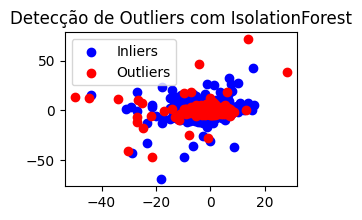

Dimensões após remoção de outliers: (9784, 561)


In [3]:
# Normalizar os dados para facilitar a detecção de outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Usar Isolation Forest para detectar outliers
model = IsolationForest(contamination=0.05, random_state=42)
outlier_predictions = model.fit_predict(X_scaled)  # -1 para outliers, 1 para inliers

# Plota os resultados
plt.figure(figsize=(3, 2))
plt.scatter(X_scaled[outlier_predictions == 1, 0], X_scaled[outlier_predictions == 1, 1], c='blue', label='Inliers')
plt.scatter(X_scaled[outlier_predictions == -1, 0], X_scaled[outlier_predictions == -1, 1], c='red', label='Outliers')
plt.title('Detecção de Outliers com IsolationForest')
plt.legend()
plt.show()

# Filtrar os dados, mantendo apenas os inliers
X_filtered = X_scaled[outlier_predictions == 1]
y_filtered = y[outlier_predictions == 1]

print(f"Dimensões após remoção de outliers: {X_filtered.shape}")



# Redução de dimensionalidade com PCA

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered)

print(f"Dimensões após PCA: {X_pca.shape}")


Dimensões após PCA: (9784, 2)


# Elbow Method para escolha do número ideal de clusters

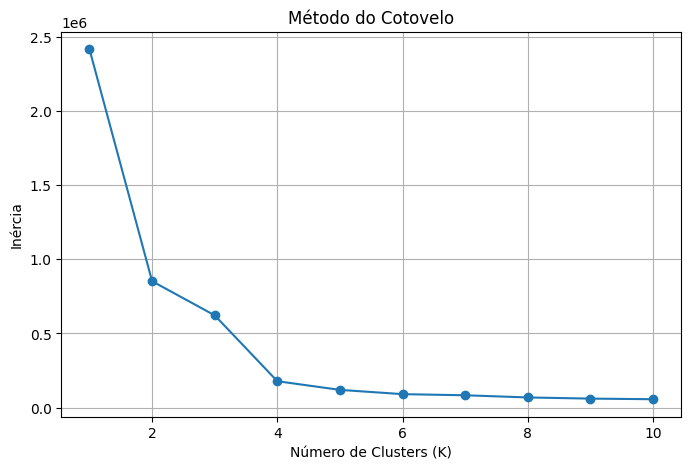

In [5]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid()
plt.show()

# Utilização do K-means

In [6]:
# Número ideal de clusters com base no gráfico
K = 4

# Treinar o modelo K-means
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42, n_init=30)
kmeans.fit(X_pca)

# Obter os rótulos dos clusters formados
cluster_labels = kmeans.labels_


# Avaliação do K-means utilizando Silhouette Score

In [7]:
silhouette = silhouette_score(X_pca, cluster_labels)

print(f"Silhouette Score: {silhouette:.4f}")


Silhouette Score: 0.7062


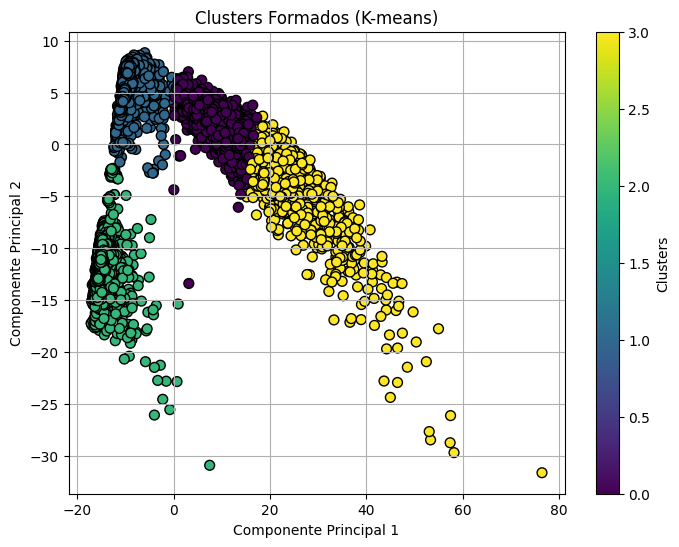

In [8]:
# Plotar os clusters formados com os dois primeiros componentes principais
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters Formados (K-means)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clusters')
plt.grid()
plt.show()
